 Auth: Mawaba P. DAO

 02/20/2021

 Florida Institute of Technology
 
 Digital Image Processing: ECE5256 (Dr. Kozaitis)


Proj 4 write up:

            In this project we find the magnitude spectrum of an image in the frequency domain. Then, having generated a low pass filter,
            we apply the filter to the image by multiplying the magnitude spectrum with the filter and computing the inverse fourier
            transform. Lastly, the same steps are repeated using a high pass filter.
    
    

In [83]:
import numpy as np 
import cv2
from scipy import signal
import matplotlib.pyplot as plt

In [151]:
def makeFilter(dim, rFraq, filt):
    ks = dim
    mask = np.zeros((ks[0],ks[1]), dtype=np.uint8)
    center_coordinates = (int(ks[1]/2), int(ks[0]/2))
    radius = img.shape[0]//rFraq
    color = (1,1,1)
    thickness = -1
    mask = cv2.circle(mask, center_coordinates, radius, 1, thickness)
    if filt == 'L': #return low pass filter
        return mask
    elif filt == 'H': #return high pass filter
        return ~mask
    else:
        print('Invalid filter type')
        return 0

# Loading an image

(1032, 774)


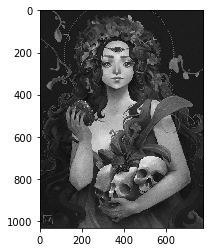

In [114]:
imgPath = "./imgs/Persephone.jpg"
img = cv2.imread(imgPath, 0)
img  = ((img - img.min()) * (1/(img.max() - img.min()) * 255)).astype('uint8')
plt.imshow(img, cmap="gray")
print(img.shape)

# Fourier transform of image

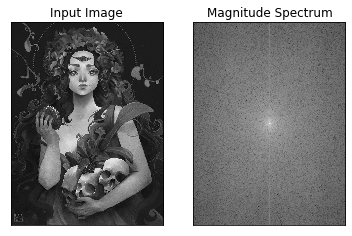

In [122]:
f = np.fft.fft2(img)
dft_shift = np.fft.fftshift(f) #Bring zero frequency component from top left corner to center
magnitude_spectrum = 20*np.log(np.abs(dft_shift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Low pass filter

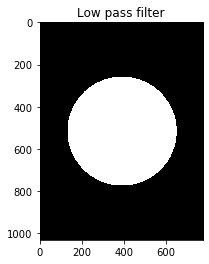

In [154]:
mask = makeFilter(img.shape, 4, 'L') #Change 4 to a smaller value to see how it affects the smoothed image
plt.imshow(mask, cmap="gray")
plt.title('Low pass filter')
plt.show()

# Low pass filtered image (smoothed)

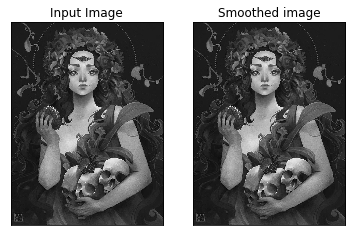

In [157]:
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift) #Bring zero frequency component from top left corner to center
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Smoothed image'), plt.xticks([]), plt.yticks([])
plt.show()

The image on the right is the smoothed image. Due to the radius of the circle in our filter, it is only slightly smoothed. Making the radius smaller generates a smoother image. As demonstrated below with a radius 1/4 the length of our current one.

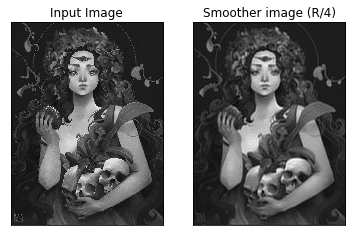

In [159]:
mask = makeFilter(img.shape, 16, 'L')
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift) #Bring zero frequency component from top left corner to center
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Smoother image (R/4)'), plt.xticks([]), plt.yticks([])
plt.show()

# High pass filter

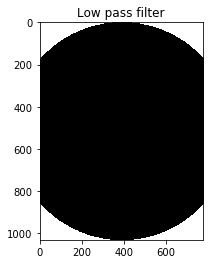

In [155]:
mask = makeFilter(img.shape, 2, 'H')
plt.imshow(mask, cmap="gray")
plt.title('High pass filter')
plt.show()


# High pass filtered image (edge enhacement)

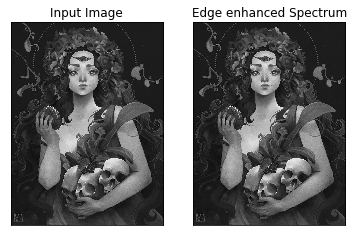

In [156]:
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Edge enhanced Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()